Coming from fastbook/04_mnist_basics.ipynb

In [4]:
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [6]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Code for min 17 onwards: https://www.kaggle.com/code/jvargh7/02a-train

In [ ]:
m = learn.model
l = m.get_submodule('0.model.stem.1') # gets the layer
list(l.parameters()) # gets the parametersm

### Part 3. Functions

In [8]:
?plot_function

Signature:
plot_function(
    f,
    tx=None,
    ty=None,
    title=None,
    min=-2,
    max=2,
    figsize=(6, 4),
)
Docstring: <no docstring>
File:      ~/miniforge3/lib/python3.12/site-packages/fastbook/__init__.py
Type:      function

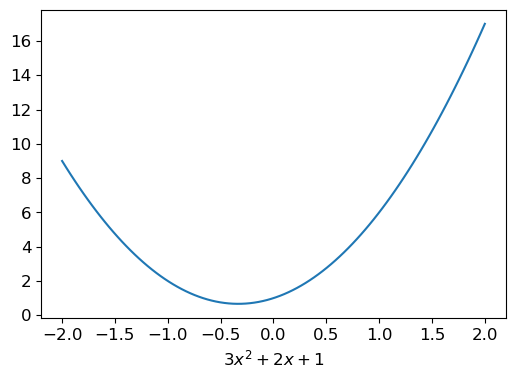

In [16]:
def f(x): return 3*x**2 + 2*x + 1
plot_function(f,"$3x^2 + 2x + 1$")

In [17]:
def quad(a,b,c,x): return a*x**2 + b*x + c

In [18]:
quad(3,2,1,1.5)

10.75

In [19]:
# Useful functionality of python
# This creates an object (partial function) that can then be used
from functools import partial
def mk_quad(a,b,c): return partial(quad, a,b,c)

In [ ]:
f = mk_quad(3,2,1)
f(3)

34

In [105]:
f

functools.partial(<function quad at 0x7f7625c09d00>, 3, 2, 1)

In [104]:
??plot_function

Signature:
plot_function(
    f,
    tx=None,
    ty=None,
    title=None,
    min=-2,
    max=2,
    figsize=(6, 4),
)
Docstring: <no docstring>
Source:   
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, 100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
File:      ~/miniforge3/lib/python3.12/site-packages/fastbook/__init__.py
Type:      function

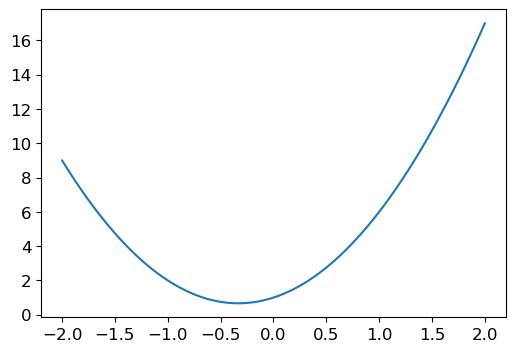

In [51]:
plot_function(f)

27:20 Fit a function by good hands and eyes

In [30]:
# Example of data that matches shape of function

from numpy.random import normal, seed, uniform
np.random.seed(42)
def noise(x, scale): return normal(scale = scale, size = x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)


/tmp/ipykernel_58156/3417579300.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)


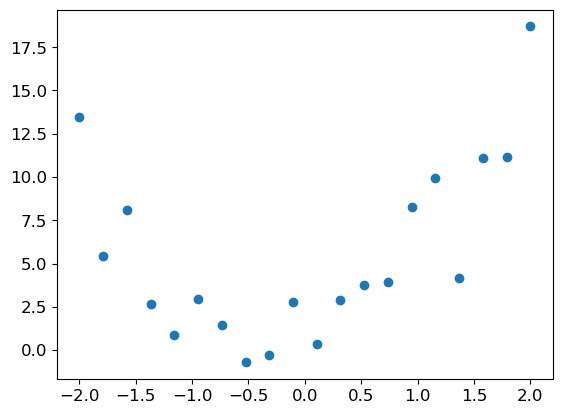

In [52]:
x = torch.linspace(-2, 2, steps = 20)[:, None]
y = add_noise(f(x),0.3,1.5)
plt.scatter(x,y);

In [53]:
from ipywidgets import interact
# Adding it to a function will allow us to play with it
@interact (a = 1.5, b = 1.5, c= 1.5)

def plot_quad(a,b,c):

    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c))


interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

30:58 Loss functions

In [55]:
def mse(preds,acts): return (preds - acts).pow(2).mean()

In [114]:
@interact(a=1.5, b = 1.5, c= 1.5)


def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mse(f(x),y)
    plot_function(f,title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [79]:
def quad_mse(params):
    f = mk_quad(*params) # * - takes params and spreads them out into a, b, c
    return mse(f(x),y)

In [81]:
abc = torch.tensor([1.5,1.5,1.5]) 
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [82]:
loss = quad_mse(abc) # abc is matched to number of arguments that quad_mse takes
# If I add more items to 
loss

tensor(12.5973, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [83]:
# Call backward to get gradients
loss.backward()

In [72]:
abc.grad

tensor([-10.9627,  -0.3835,  -3.6687])

In [117]:
??torch.no_grad

Init signature: torch.no_grad() -> None
Source:        
class no_grad(_NoParamDecoratorContextManager):
    r"""Context-manager that disables gradient calculation.

    Disabling gradient calculation is useful for inference, when you are sure
    that you will not call :meth:`Tensor.backward()`. It will reduce memory
    consumption for computations that would otherwise have `requires_grad=True`.

    In this mode, the result of every computation will have
    `requires_grad=False`, even when the inputs have `requires_grad=True`.
    There is an exception! All factory functions, or functions that create
    a new Tensor and take a requires_grad kwarg, will NOT be affected by
    this mode.

    This context manager is thread local; it will not affect computation
    in other threads.

    Also functions as a decorator.

    .. note::
        No-grad is one of several mechanisms that can enable or
        disable gradients locally see :ref:`locally-disable-grad-doc` for
        more inf

In [ ]:
# Standard part of a pytorch loop
# torch.no_grad() is a context manager that disables gradient tracking
# This is important because we don't want to track the gradients of the parameters
# when we are updating them
with torch.no_grad():
    # -= is in place operation
    # This will update abc in place
    

    abc -= abc.grad * 0.01

    loss = quad_mse(abc)
print(f'loss={loss:.2f}')

loss=8.44


In [ ]:
# Basic kind of optimizer
# Gradient descent --> calculate gradient, do a descent that decreases the loss
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad * 0.01
    print(f'step={i}, loss={loss:.2f}')

step=0, loss=11.32
step=1, loss=9.21
step=2, loss=7.01
step=3, loss=5.49
step=4, loss=5.18


In [86]:
abc

tensor([3.1979, 1.5729, 2.0219], requires_grad=True)

In [87]:
def rectified_linear(m,b,x):
    y = m*x + b 
    return torch.clip(y,0.) # If it's smaller than 0, then it makes it zero
    # return torch.where(x > 0, x * m + b, b)

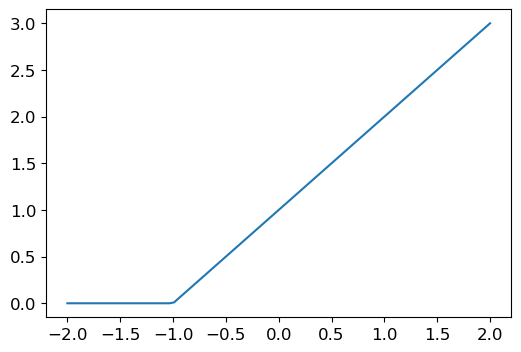

In [90]:
plot_function(partial(rectified_linear,1,1 ))

In [ ]:
@interact(m = 1.5, b = 1.5)

def plot_relu(m,b):
    plot_function(partial(rectified_linear,m,b))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [102]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

In [ ]:



@interact(m1 = 1.5, b1 = 1.5,m2 = 1, b2 = 1.5)

def plot_double_relu(m1,b1,m2,b2):
    plot_function(partial(double_relu,m1,b1,m2,b2))      

interactive(children=(FloatSlider(value=1.5, description='m1', max=4.5, min=-1.5), FloatSlider(value=1.5, desc…